In [1]:
import os
import pandas as pd
import re
from wordcloud import WordCloud

In [2]:
files = [f for f in os.listdir(".\\Documents") if not f.startswith('.')]

In [3]:
files

['01 - Kraków.txt',
 '02 - Warszawa.txt',
 '03 - Wrocław.txt',
 '04 - Józefów.txt',
 '05 - Kokołaje.txt',
 '06 - Garwolin.txt',
 '07 - Epidemiologia otyłości na świecie i w Polsce.txt',
 '08 - Trendy w występowaniu nadwagi w Polsce.txt',
 '09 - Otyłość - choroba wagi ciężkiej.txt',
 '10 - Otyłość i jej konsekwencje.txt',
 '11 - Barcelona już świętowała mistrzostwo! Wtedy nadeszła 95. minuta meczu Realu.txt',
 '12 - 71 lat i koniec! Kylian Mbappe przeszedł do historii! Oto nowy rekord.txt',
 '13 - Oto dlaczego Wojciech Szczęsny musi odejść z Barcelony.txt',
 '14 - Pertkiewicz Nawet nie bierzemy pod uwagę transferów gotówkowych [WYWIAD].txt',
 '15 - Lewy bez gola, Szczęsny bez gry. Barcelona przegrywa i świętuje.txt',
 '16 - Carbonara ze szparagami.txt',
 '17 - Sałatka ze szparagów.txt',
 '18 - Żurek wegetariański.txt',
 '19 - Calzone.txt']

In [4]:
corpus = pd.DataFrame(columns=['document'])

for file in files:
    with open(".\\Documents\\" + file,mode="rt", encoding="utf-8") as f:
        txt = f.read()
    #print("==================")
    #print(txt)
    row = pd.DataFrame([{'document':txt}])
    corpus = pd.concat([corpus,row],ignore_index = True)

In [5]:
import spacy

In [6]:
import pl_core_news_md

In [7]:
# konieczne wykonanie w oknie terminala: python -m spacy download en_core_web_md  

nlp = pl_core_news_md.load()

In [8]:
tokens = []
removal = ['ADV', 'PRON', 'CCONJ', 'PUNCT', 'PART', 'DET', 'ADP', 'SPACE', 'NUM', 'SYM']

for txt in nlp.pipe(corpus['document']):
   # Process using Polish language model
   proj_tok = [token.lemma_.lower() for token in txt 
               if token.pos_ not in removal 
               and not token.is_stop 
               and token.is_alpha]
   tokens.append(proj_tok)

In [9]:
tokens

[['kraków',
  'krzysztof',
  'ukrainiec',
  'mieszkać',
  'polska',
  'lubić',
  'odwiedzać',
  'polski',
  'miasto',
  'poznawać',
  'historia',
  'kultura',
  'kraj',
  'oglądać',
  'zabytek',
  'kolejny',
  'weekend',
  'kolejny',
  'wyprawa',
  'raz',
  'kraków',
  'pociąg',
  'krzysztof',
  'zdecydować',
  'podróż',
  'samochód',
  'polski',
  'przyjaciółka',
  'ania',
  'znać',
  'planować',
  'ania',
  'spontaniczny',
  'osoba',
  'zmieniać',
  'zdanie',
  'krzysztof',
  'chcieć by',
  'zobaczyć',
  'zabytek',
  'ania',
  'wolałaby',
  'iść',
  'koncert',
  'filharmonia',
  'wyjść',
  'plan',
  'raz',
  'przyjazd',
  'udać',
  'uniknąć',
  'kork',
  'zobaczyć',
  'rynek',
  'główny',
  'ulubiony',
  'miejsce',
  'turysta',
  'kraków',
  'atmosfera',
  'szczególny',
  'zasługa',
  'okoliczny',
  'zabytek',
  'sukiennica',
  'kościół',
  'mariacki',
  'wieża',
  'ratuszowy',
  'kościół',
  'święty',
  'wojciech',
  'przepiękny',
  'stary',
  'kamienica',
  'kolejny',
  'etap',
  '

In [10]:
import gensim

In [11]:
id2word = gensim.corpora.Dictionary(tokens)

In [12]:
dtm = [id2word.doc2bow(doc) for doc in tokens]

In [13]:
num_topics = 4
lda_model = gensim.models.LdaMulticore(corpus = dtm, id2word=id2word, num_topics=num_topics,passes=250,random_state=100)

In [14]:
lda_model.print_topics()

[(0,
  '0.008*"real" + 0.007*"gol" + 0.007*"barcelona" + 0.006*"minuta" + 0.006*"mecz" + 0.005*"pierwszy" + 0.005*"strona" + 0.004*"villarreal" + 0.004*"mbappe" + 0.004*"lewandowski"'),
 (1,
  '0.015*"miasto" + 0.011*"mieszkaniec" + 0.009*"lokalny" + 0.007*"józefów" + 0.007*"życie" + 0.006*"wieś" + 0.006*"miejsce" + 0.006*"warszawa" + 0.005*"miejski" + 0.004*"społeczny"'),
 (2,
  '0.006*"móc" + 0.005*"ser" + 0.005*"barcelona" + 0.005*"gram" + 0.004*"trener" + 0.004*"sezon" + 0.004*"klub" + 0.004*"arka" + 0.004*"duży" + 0.004*"szparag"'),
 (3,
  '0.036*"otyłość" + 0.015*"osoba" + 0.012*"rok" + 0.012*"występować" + 0.010*"nadwaga" + 0.008*"polska" + 0.008*"kobieta" + 0.008*"mężczyzna" + 0.008*"choroba" + 0.007*"otyły"')]

In [15]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, dtm, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.123947  0.143408       1        1  38.335387
2     -0.159327  0.003294       2        1  27.704643
3      0.100225 -0.162131       3        1  23.923066
0     -0.064846  0.015429       4        1  10.036904, topic_info=             Term       Freq      Total Category  logprob  loglift
1949      otyłość  99.000000  99.000000  Default  30.0000  30.0000
1427   występować  34.000000  34.000000  Default  29.0000  29.0000
60          osoba  56.000000  56.000000  Default  28.0000  28.0000
48         miasto  70.000000  70.000000  Default  27.0000  27.0000
1914      nadwaga  27.000000  27.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
2628  mistrzostwo   2.773029   5.611869   Topic4  -6.0326   1.5940
1801        wynik   3.829809  16.807383   Topic4  -5.7097   0.8199
2683        sezon   3.829243  17.999945   Topic4  -5.7098   0.7512
542        koniec   2.773055  14.738131   Topic4  -6.0326   0.6284
664       ostatni   2.773022  14.828578   Topic4  -6.0326   0.6223

[220 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3170      2  0.959615       arka
2808      2  0.838347      awans
2808      4  0.104793      awans
1845      3  0.945529    badanie
2566      2  0.653278  barcelona
...     ...       ...        ...
3940      1  0.946243      żurek
1016      1  0.832751      życie
1016      2  0.025235      życie
1016      3  0.126174      życie
1016      4  0.025235      życie

[284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

Topics found by LDA:
Topic #0: 0.008*"real" + 0.007*"gol" + 0.007*"barcelona" + 0.006*"minuta" + 0.006*"mecz" + 0.005*"pierwszy" + 0.005*"strona" + 0.004*"villarreal" + 0.004*"mbappe" + 0.004*"lewandowski"
Topic #1: 0.015*"miasto" + 0.011*"mieszkaniec" + 0.009*"lokalny" + 0.007*"józefów" + 0.007*"życie" + 0.006*"wieś" + 0.006*"miejsce" + 0.006*"warszawa" + 0.005*"miejski" + 0.004*"społeczny"
Topic #2: 0.006*"móc" + 0.005*"ser" + 0.005*"barcelona" + 0.005*"gram" + 0.004*"trener" + 0.004*"sezon" + 0.004*"klub" + 0.004*"arka" + 0.004*"duży" + 0.004*"szparag"
Topic #3: 0.036*"otyłość" + 0.015*"osoba" + 0.012*"rok" + 0.012*"występować" + 0.010*"nadwaga" + 0.008*"polska" + 0.008*"kobieta" + 0.008*"mężczyzna" + 0.008*"choroba" + 0.007*"otyły"


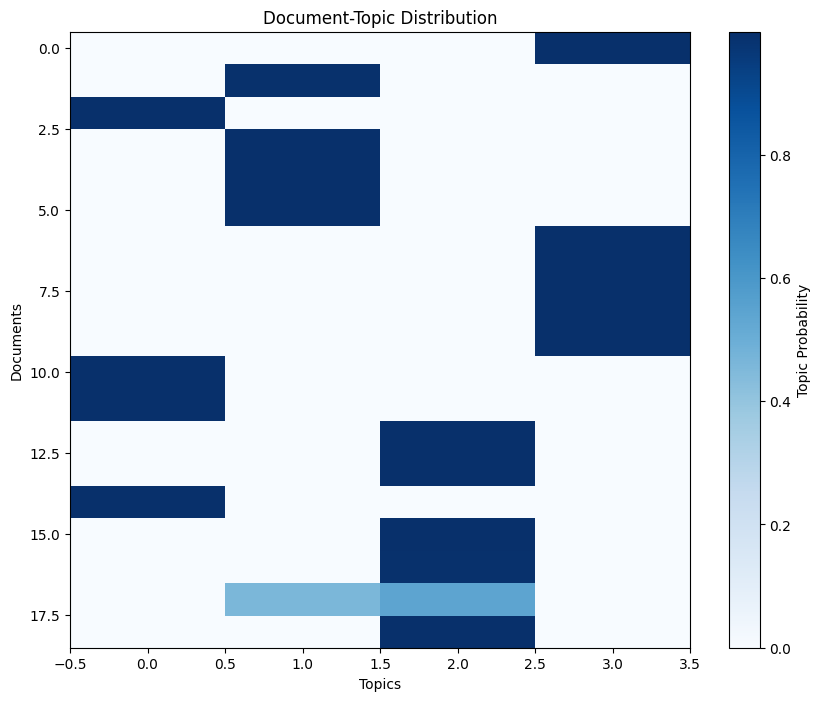

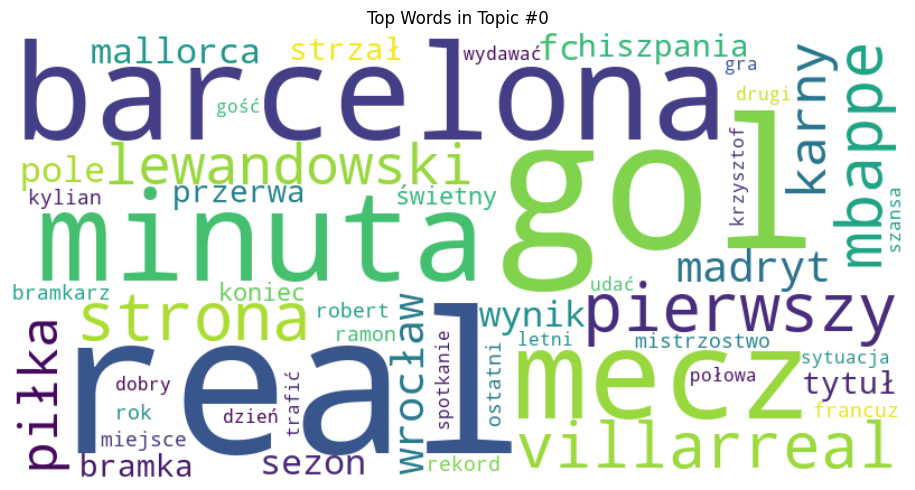

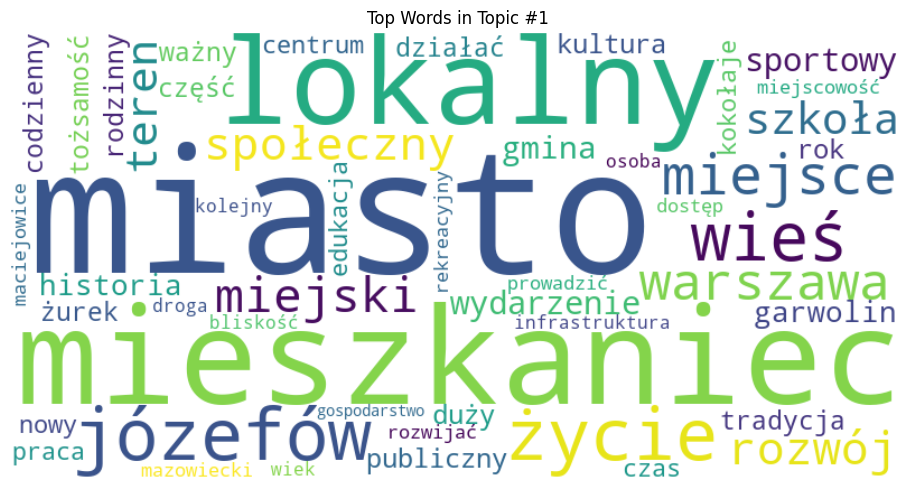

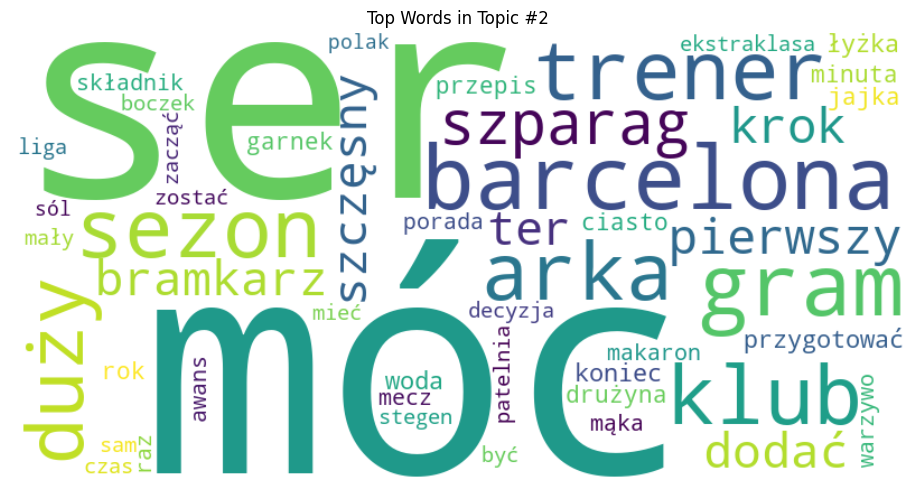

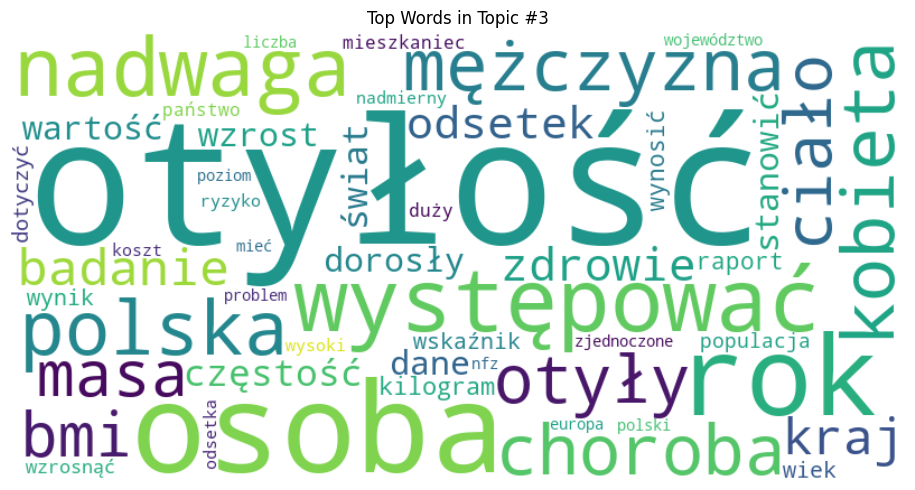

In [16]:
# Alternative visualization approach
import matplotlib.pyplot as plt
import numpy as np

# 1. Print the topics
print("Topics found by LDA:")
for topic_id, topic in lda_model.print_topics():
    print(f"Topic #{topic_id}: {topic}")

# 2. Create a simple visualization of document-topic distribution
doc_topics = [lda_model.get_document_topics(doc) for doc in dtm]

# Create a matrix with document-topic distribution
topic_matrix = np.zeros((len(doc_topics), num_topics))
for i, doc in enumerate(doc_topics):
    for topic_id, prob in doc:
        topic_matrix[i, topic_id] = prob

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(topic_matrix, cmap='Blues', aspect='auto')
plt.colorbar(label='Topic Probability')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.title('Document-Topic Distribution')
plt.savefig('./results/topic_distribution.png')
plt.show()

# 3. Create word clouds for each topic
from wordcloud import WordCloud

for topic_id in range(num_topics):
    # Get the top words for this topic
    word_dict = dict(lda_model.show_topic(topic_id, topn=50))
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        contour_width=3,
        contour_color='steelblue'
    ).generate_from_frequencies(word_dict)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top Words in Topic #{topic_id}')
    plt.tight_layout()
    plt.savefig(f'./results/topic_{topic_id}_wordcloud.png')
    plt.show()